### Load data first

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import time
import sys

sys.path.append(os.path.abspath(".."))   # Add root path to sys.path
os.chdir("..")  # Change working directory to root path

from src.preprocessing import read_image, windy_preprocessing_pipeline
from tqdm.notebook import tqdm
from datetime import datetime


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# from src.preprocessing import read_numpy_grid, nexrad_numpy_preprocessing_pipeline
# from tqdm.notebook import tqdm

# data_name = "KARX"
# SOURCE_PATH = f"data/numpy_grid/{data_name}"

# img_paths = [
#     os.path.join(SOURCE_PATH, img_name) for img_name in sorted(os.listdir(SOURCE_PATH)) if img_name.endswith('.npy')
# ][:20]

# img_shape = read_numpy_grid(img_paths[0]).shape       # get shape of the image

# print(f"Image shape: {img_shape}")
# print(f"-" * 20)

# time_frames = []
# dbz_maps = []    

# for path in tqdm(img_paths, desc="Processing images and detecting storms"):
#     file_name = path.split("/")[-1].split(".")[0]
#     # time_frames.append(datetime.strptime(file_name[:-4], '%Y%m%d-%H%M%S'))       # Get file name without extension
#     time_frames.append(datetime.strptime(file_name[4:19], "%Y%m%d_%H%M%S"))       # Get file name without extension
#     img = read_numpy_grid(path)
#     dbz_maps.append(nexrad_numpy_preprocessing_pipeline(img))

# print(f"Number of frames: {len(dbz_maps)}")

In [3]:
file_name = "philippines_13.269_123.832"

SOURCE_PATH = f"data/image_old/{file_name}"

img_paths = [
    os.path.join(SOURCE_PATH, img_name) for img_name in sorted(os.listdir(SOURCE_PATH)) if img_name.endswith('.png')
][:50]

img_shape = read_image(img_paths[0]).shape       # get shape of the image
print(f"Image shape: {img_shape}")
print(f"-" * 20)

time_frames = []
dbz_maps = []       

for path in tqdm(img_paths, desc="Processing images and detecting storms"):
    time_frames.append(datetime.strptime(os.path.basename(path).split('/')[0][:-4], '%Y%m%d-%H%M%S'))       # Get file name without extension
    img = read_image(path)
    dbz_maps.append(windy_preprocessing_pipeline(img))

print(f"Number of frames: {len(dbz_maps)}")

Image shape: (505, 1220, 3)
--------------------


Processing images and detecting storms:   0%|          | 0/50 [00:00<?, ?it/s]

Number of frames: 50


## Load model

In [4]:
from src.models import OursPrecipitationModel
from src.identification import HypothesisIdentifier

model = OursPrecipitationModel(identifier=HypothesisIdentifier())

storms_maps = []

for idx, (dbz_map, time_frame) in enumerate(tqdm(zip(dbz_maps, time_frames), total=len(dbz_maps), desc="Detecting storms")):
    storms_map = model.identify_storms(dbz_map, time_frame, map_id=f"time_{idx}", threshold=35, filter_area=30)
    storms_maps.append(storms_map)

Detecting storms:   0%|          | 0/50 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_0:   0%|          | 0/314 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_1:   0%|          | 0/302 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_2:   0%|          | 0/133 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_3:   0%|          | 0/83 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_4:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_5:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_6:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_7:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_8:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_0:   0%|          | 0/275 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_1:   0%|          | 0/247 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_2:   0%|          | 0/104 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_3:   0%|          | 0/94 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_4:   0%|          | 0/78 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_5:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_6:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_7:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_8:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_9:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_10:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_13:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_0:   0%|          | 0/458 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_1:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_2:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_3:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_4:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_5:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_6:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_0:   0%|          | 0/433 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_1:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_2:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_3:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_4:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_5:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_6:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_7:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_8:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_9:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_10:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_0:   0%|          | 0/401 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_1:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_2:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_3:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_4:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_5:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_6:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_7:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_8:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_0:   0%|          | 0/258 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_1:   0%|          | 0/36 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_2:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_3:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_4:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_5:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_6:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_7:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_8:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_9:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_10:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_11:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_0:   0%|          | 0/257 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_1:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_2:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_3:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_4:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_5:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_6:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_7:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_8:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_10:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_11:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_13:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_15:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_0:   0%|          | 0/150 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_1:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_2:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_3:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_4:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_5:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_6:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_7:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_8:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_9:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_10:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_11:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_0:   0%|          | 0/152 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_1:   0%|          | 0/38 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_2:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_3:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_4:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_5:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_6:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_7:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_8:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_0:   0%|          | 0/158 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_1:   0%|          | 0/39 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_2:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_3:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_4:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_5:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_6:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_7:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_9:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_11:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_0:   0%|          | 0/135 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_1:   0%|          | 0/39 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_2:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_3:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_4:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_5:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_6:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_7:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_8:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_9:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_0:   0%|          | 0/120 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_1:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_2:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_3:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_4:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_5:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_6:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_7:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_8:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_9:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_10:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_0:   0%|          | 0/51 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_1:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_2:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_3:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_4:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_5:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_6:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_7:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_9:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_11:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_12:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_13:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_14:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_15:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_16:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_17:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_18:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_19:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_20:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_0:   0%|          | 0/47 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_1:   0%|          | 0/36 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_2:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_3:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_4:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_5:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_6:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_7:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_8:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_10:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_13:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_0:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_1:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_2:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_3:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_4:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_5:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_6:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_7:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_8:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_9:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_10:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_11:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_13:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_15:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_16:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_0:   0%|          | 0/78 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_1:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_2:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_3:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_4:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_5:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_6:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_7:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_8:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_9:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_10:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_0:   0%|          | 0/79 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_1:   0%|          | 0/58 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_2:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_3:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_4:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_5:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_6:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_7:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_0:   0%|          | 0/113 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_1:   0%|          | 0/51 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_2:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_3:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_4:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_5:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_6:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_7:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_8:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_9:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_10:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_13:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_14:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_0:   0%|          | 0/109 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_1:   0%|          | 0/44 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_2:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_3:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_4:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_5:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_6:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_7:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_9:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_10:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_11:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_12:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_0:   0%|          | 0/107 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_1:   0%|          | 0/44 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_2:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_3:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_4:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_5:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_6:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_7:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_8:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_10:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_11:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_0:   0%|          | 0/132 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_1:   0%|          | 0/57 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_2:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_3:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_4:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_5:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_6:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_7:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_8:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_9:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_10:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_0:   0%|          | 0/131 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_1:   0%|          | 0/54 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_2:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_3:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_4:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_5:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_6:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_7:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_8:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_0:   0%|          | 0/223 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_1:   0%|          | 0/52 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_2:   0%|          | 0/51 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_3:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_4:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_5:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_6:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_7:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_9:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_10:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_11:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_12:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_13:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_0:   0%|          | 0/236 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_1:   0%|          | 0/46 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_2:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_3:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_4:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_5:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_6:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_7:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_8:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_11:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_12:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_0:   0%|          | 0/246 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_1:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_2:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_3:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_4:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_5:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_6:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_7:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_8:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_11:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_12:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_0:   0%|          | 0/264 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_1:   0%|          | 0/58 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_2:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_3:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_4:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_5:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_6:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_7:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_8:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_11:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_12:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_13:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_14:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_0:   0%|          | 0/229 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_1:   0%|          | 0/46 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_2:   0%|          | 0/41 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_3:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_4:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_5:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_6:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_7:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_8:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_9:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_10:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_11:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_12:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_13:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_0:   0%|          | 0/253 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_1:   0%|          | 0/119 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_2:   0%|          | 0/70 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_3:   0%|          | 0/42 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_4:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_5:   0%|          | 0/36 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_6:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_7:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_8:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_9:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_10:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_11:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_12:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_13:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_0:   0%|          | 0/366 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_1:   0%|          | 0/97 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_2:   0%|          | 0/34 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_3:   0%|          | 0/34 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_4:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_5:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_6:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_7:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_8:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_9:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_10:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_12:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_13:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_0:   0%|          | 0/340 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_1:   0%|          | 0/159 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_2:   0%|          | 0/55 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_3:   0%|          | 0/51 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_4:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_5:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_6:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_7:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_8:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_9:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_0:   0%|          | 0/228 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_1:   0%|          | 0/178 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_2:   0%|          | 0/150 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_3:   0%|          | 0/48 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_4:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_5:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_6:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_7:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_8:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_9:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_10:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_12:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_13:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_0:   0%|          | 0/219 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_1:   0%|          | 0/151 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_2:   0%|          | 0/129 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_3:   0%|          | 0/50 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_4:   0%|          | 0/46 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_5:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_6:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_7:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_8:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_9:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_10:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_11:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_12:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_15:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_0:   0%|          | 0/221 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_1:   0%|          | 0/181 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_2:   0%|          | 0/112 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_3:   0%|          | 0/109 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_4:   0%|          | 0/72 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_5:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_6:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_7:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_8:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_9:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_10:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_11:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_12:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_13:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_0:   0%|          | 0/212 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_1:   0%|          | 0/197 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_2:   0%|          | 0/148 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_3:   0%|          | 0/60 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_4:   0%|          | 0/38 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_5:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_6:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_7:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_8:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_9:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_10:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_11:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_12:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_13:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_14:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_15:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_16:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_17:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_0:   0%|          | 0/218 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_1:   0%|          | 0/191 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_2:   0%|          | 0/141 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_3:   0%|          | 0/44 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_4:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_5:   0%|          | 0/38 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_6:   0%|          | 0/34 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_7:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_8:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_9:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_10:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_11:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_12:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_13:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_14:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_15:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_16:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_0:   0%|          | 0/480 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_1:   0%|          | 0/207 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_2:   0%|          | 0/47 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_3:   0%|          | 0/39 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_4:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_5:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_6:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_7:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_9:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_11:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_0:   0%|          | 0/241 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_1:   0%|          | 0/211 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_2:   0%|          | 0/103 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_3:   0%|          | 0/49 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_4:   0%|          | 0/34 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_5:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_6:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_7:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_8:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_9:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_10:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_11:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_12:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_13:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_15:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_16:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_17:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_18:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_19:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_20:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_21:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_22:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_23:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_0:   0%|          | 0/247 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_1:   0%|          | 0/80 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_2:   0%|          | 0/72 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_3:   0%|          | 0/64 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_4:   0%|          | 0/56 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_5:   0%|          | 0/49 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_6:   0%|          | 0/47 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_7:   0%|          | 0/45 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_8:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_9:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_10:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_11:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_12:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_13:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_15:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_16:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_17:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_18:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_19:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_0:   0%|          | 0/642 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_1:   0%|          | 0/67 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_2:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_3:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_4:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_5:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_6:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_7:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_8:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_9:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_10:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_0:   0%|          | 0/673 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_1:   0%|          | 0/42 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_2:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_3:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_4:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_5:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_6:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_7:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_8:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_10:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_0:   0%|          | 0/665 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_1:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_2:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_3:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_4:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_5:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_6:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_0:   0%|          | 0/650 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_1:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_2:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_3:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_4:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_5:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_6:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_0:   0%|          | 0/314 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_1:   0%|          | 0/205 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_2:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_3:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_4:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_5:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_6:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_7:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_8:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_9:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_10:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_0:   0%|          | 0/190 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_1:   0%|          | 0/172 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_2:   0%|          | 0/122 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_3:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_4:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_5:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_6:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_7:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_8:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_9:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_0:   0%|          | 0/320 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_1:   0%|          | 0/184 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_2:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_3:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_4:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_5:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_6:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_0:   0%|          | 0/282 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_1:   0%|          | 0/168 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_2:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_3:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_4:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_5:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_6:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_7:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_8:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_10:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_11:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_0:   0%|          | 0/297 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_1:   0%|          | 0/166 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_2:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_3:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_4:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_5:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_6:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_7:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_8:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_9:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_10:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_0:   0%|          | 0/131 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_1:   0%|          | 0/41 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_2:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_3:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_4:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_5:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_6:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_7:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_8:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_9:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_11:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_12:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_13:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_15:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_16:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_0:   0%|          | 0/124 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_1:   0%|          | 0/39 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_2:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_3:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_4:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_5:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_6:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_7:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_8:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_9:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_10:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_11:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_13:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing ShapeVectorStorms:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_0:   0%|          | 0/124 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_1:   0%|          | 0/46 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_2:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_3:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_4:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_5:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_6:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_7:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_8:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_9:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_10:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

## Benchmark model
Assume that storm do not change overtime, use previous map as the predicted map

In [11]:
from src.cores.base import StormsMap
from src.cores.metrics import pod_score, far_score, csi_score

class PredictionBenchmarkModel:
    def __init__(self):
        self.pods = []
        self.fars = []
        self.csis = []
        self.actual = []
        self.predicted = []

    def evaluate_predict(self, actual_storms_map: StormsMap, predicted_storms_map: StormsMap):
        self.actual.append(actual_storms_map)
        self.predicted.append(predicted_storms_map)
        self.pods.append(pod_score(actual_storms_map, predicted_storms_map))
        self.fars.append(far_score(actual_storms_map, predicted_storms_map))
        self.csis.append(csi_score(actual_storms_map, predicted_storms_map))

# Create benchmark model
benchmark_model = PredictionBenchmarkModel()
PREDICT_FORWARD_STEPS = 5                           # 1 hour ahead
SLOW_START_STEPS = 10

for t in tqdm(range(PREDICT_FORWARD_STEPS, len(storms_maps)), desc="Evaluating benchmark model"):
    actual_storms_map = storms_maps[t]
    predicted_storms_map = storms_maps[t - PREDICT_FORWARD_STEPS]  # Assume storm do not change
    benchmark_model.evaluate_predict(actual_storms_map, predicted_storms_map)

print("Benchmark Model evaluation results:")
print(f"\tAverage POD: {np.mean(benchmark_model.pods):.4f}")
print(f"\tAverage FAR: {np.mean(benchmark_model.fars):.4f}")
print(f"\tAverage CSI: {np.mean(benchmark_model.csis):.4f}")

Evaluating benchmark model:   0%|          | 0/45 [00:00<?, ?it/s]

Benchmark Model evaluation results:
	Average POD: 0.4511
	Average FAR: 0.5400
	Average CSI: 0.2943


## Testing model tracking

In [6]:
max_velocity = 100
weights = (0.5, 0.5)        # weights for (spatial distance, shape vector difference)

model = OursPrecipitationModel(identifier=HypothesisIdentifier(), max_velocity=max_velocity, weights=weights)  # max_velocity in pixels per hour
temp_storm_map = storms_maps

ours_model_evaluation = PredictionBenchmarkModel()
predicted_maps = []

for i in range(SLOW_START_STEPS):
    model.processing_map(temp_storm_map[i])  # Warm-up phase

for curr_map, future_map in tqdm(list(zip(temp_storm_map[SLOW_START_STEPS:], temp_storm_map[PREDICT_FORWARD_STEPS + SLOW_START_STEPS:])), desc="Predicting precipitation maps"):
    # Predict map using current data
    dt_seconds = (future_map.time_frame - model.storms_maps[-1].time_frame).total_seconds()
    predicted_map = model.forecast(dt_seconds)
    ours_model_evaluation.evaluate_predict(future_map, predicted_map)

    # Update new map into knowledge
    model.processing_map(curr_map)  # Update model with the current map

print("Our model evaluation:")
print(f"\tAverage POD: {np.mean(ours_model_evaluation.pods):.4f}")
print(f"\tAverage FAR: {np.mean(ours_model_evaluation.fars):.4f}")
print(f"\tAverage CSI: {np.mean(ours_model_evaluation.csis):.4f}")

Predicting precipitation maps:   0%|          | 0/37 [00:00<?, ?it/s]

Our model evaluation:
	Average POD: 0.5396
	Average FAR: 0.4797
	Average CSI: 0.3621


# Overall Analyzing on tracking process
In this tracking, I used both of the median duration and linearity error of tracking

### A. Meadian duration tracking

Median duration of tracking: 7.0 frames
Maximum duration of tracking: 46 frames
Mean duration of tracking: 11.82 frames


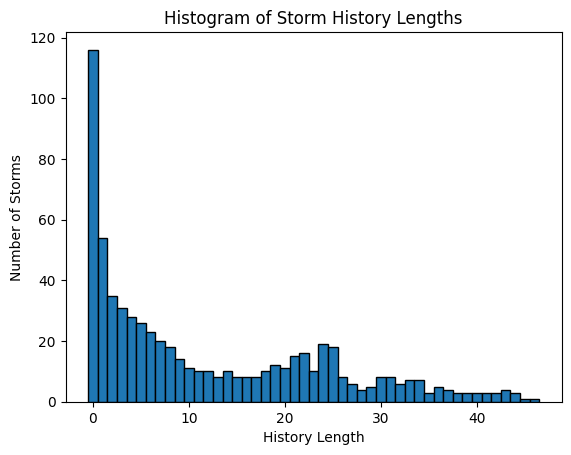

In [7]:
HISTORY_LENGTH_LST = []             # Retrieve history length of all storms

for storms_map in storms_maps:
    for storm in storms_map.storms:
        HISTORY_LENGTH_LST.append(len(storm.history_movements))   # Append history length of each storm

MEDIAN_DURATION = np.median(HISTORY_LENGTH_LST)

print(f"Median duration of tracking: {MEDIAN_DURATION} frames")
print(f"Maximum duration of tracking: {max(HISTORY_LENGTH_LST)} frames")
print(f"Mean duration of tracking: {np.mean(HISTORY_LENGTH_LST):.2f} frames")

plt.hist(HISTORY_LENGTH_LST, bins=range(0, max(HISTORY_LENGTH_LST) + 2), align='left', edgecolor='black')
plt.title("Histogram of Storm History Lengths")
plt.xlabel("History Length")
plt.ylabel("Number of Storms")
plt.show()

### B. Linearity error tracking
Use linearity to track the different between linear fitting of previous history against the actual matched movement

In [8]:
from sklearn.linear_model import LinearRegression
from functools import reduce
import matplotlib.pyplot as plt

def linear_error(movement_history: list[tuple[float, float]]) -> float:
    """
    Compute the linear fitting error distance of final point to the fitted line of previous points.
    """
    points = reduce(lambda points, movement: points + [(points[-1][0] + movement[0], points[-1][1] + movement[1])], movement_history, [(0, 0)])

    # Compute the linear fit parameters
    points = np.array(points)
    x = points[:-1, 0]
    y = points[:-1, 1]

    model = LinearRegression().fit(x.reshape(-1, 1), y)

    # Compute the distance from the final point to the fitted line
    final_point = points[-1]

    return abs(final_point[1] - (model.coef_[0] * final_point[0] + model.intercept_)) / np.sqrt(model.coef_[0]**2 + 1)

# Accumulate linear errors for all storms
LINEAR_ERRORS_LST = []

for storms_map in tqdm(storms_maps, desc="Computing linear fitting errors for storms"):
    for storm in storms_map.storms:
        # If not enough history, skip
        if len(storm.history_movements) <= MEDIAN_DURATION:
            continue

        # Fit linear model
        error_distance = linear_error(storm.history_movements[:-1]) ** 2      # Final one used for evaluate the movement prediction
        LINEAR_ERRORS_LST.append(error_distance)

print(f"RMSE of linear fitting errors: {np.sqrt(np.mean(LINEAR_ERRORS_LST)):.4f}. Total length: {len(LINEAR_ERRORS_LST)}")

Computing linear fitting errors for storms:   0%|          | 0/50 [00:00<?, ?it/s]

RMSE of linear fitting errors: 46.2784. Total length: 311


In [9]:
import colorsys

def spectral_colors(n: int) -> list[list[int]]:
    """
    Generate n RGB colors following the visible spectrum.
    
    Parameters
    ----------
    n : int
        Number of colors to generate.
    
    Returns
    -------
    list[list[int]]
        List of RGB colors (each element is [R, G, B], with values 0–255).
    """
    colors = []
    for i in range(n):
        # Hue ranges from 0.0 (red) to 0.83 (violet) approximately
        hue = i / max(1, n - 1) * 0.83  
        r, g, b = colorsys.hsv_to_rgb(hue, 1.0, 1.0)
        colors.append([int(r * 255), int(g * 255), int(b * 255)])
    return colors

Processing all storm maps for movement history visualization:   0%|          | 0/50 [00:00<?, ?it/s]

----  CURRENT MAP at time 2025-01-08 08:04:56  ----
Storm 0: Number of movement history records: 37
Storm 1: Number of movement history records: 2
Storm 2: Number of movement history records: 49
Storm 3: Number of movement history records: 2
Storm 4: Number of movement history records: 4
Storm 5: Number of movement history records: 2
Storm 6: Number of movement history records: 37
Storm 7: Number of movement history records: 7
Storm 8: Number of movement history records: 2
Storm 9: Number of movement history records: 7
Storm 10: Number of movement history records: 37
Storm 11: Number of movement history records: 2
Storm 12: Number of movement history records: 2


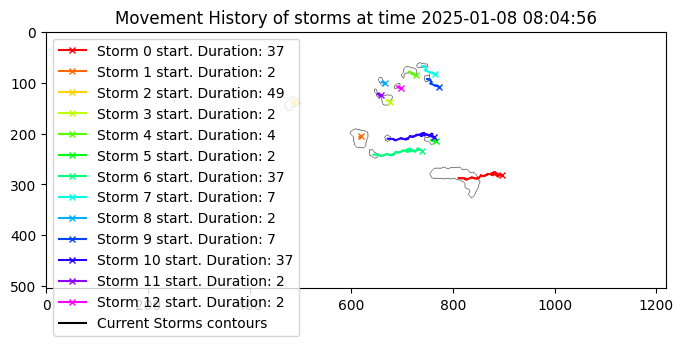

In [10]:
from src.preprocessing import convert_polygons_to_contours

num_maps = len(storms_maps)
MAX_VELOCITY = 100              # pixels per hour

model = OursPrecipitationModel(identifier=HypothesisIdentifier(), max_velocity=MAX_VELOCITY)  # max_velocity in pixels per hour

for i in tqdm(range(num_maps), desc="Processing all storm maps for movement history visualization"):
    model.processing_map(storms_maps[i])  # Warm-up phase

plt.figure(figsize=(8, 8))
blank_img = np.ones(shape=(img_shape[0], img_shape[1], 3), dtype=np.uint8) * 255

current_map = storms_maps[-1]
print(f"----  CURRENT MAP at time {current_map.time_frame.strftime('%Y-%m-%d %H:%M:%S')}  ----")

colors = spectral_colors(len(current_map.storms))

for idx, storm in enumerate(current_map.storms):
    print(f"Storm {idx}: Number of movement history records: {len(storm.history_movements)}")
    current_frame = current_map.time_frame

    color = np.array(colors[idx]) / 255.0
    end_point = (storm.contour.centroid.x, storm.contour.centroid.y)

    # backtrack the movement history
    for move_idx, movement in enumerate(storm.history_movements):
        prev_frame = storms_maps[-(move_idx + 2)].time_frame
        dt = (current_frame - prev_frame).seconds / 3600
        current_frame = prev_frame

        dy, dx = movement[0] * dt, movement[1] * dt

        start = end_point[0] - dx, end_point[1] - dy
        plt.plot([start[0], end_point[0]], [start[1], end_point[1]], color=color)
        end_point = start
    
    plt.plot(end_point[0], end_point[1], marker='x', color=color, markersize=5, label=f'Storm {idx} start. Duration: {len(storm.history_movements)}')

contours = convert_polygons_to_contours([storm.contour for storm in current_map.storms])
cv2.drawContours(blank_img, contours, -1, (0, 0, 0), 1)
plt.plot([], [], color='black', label='Current Storms contours')
plt.title(f"Movement History of storms at time {current_map.time_frame.strftime('%Y-%m-%d %H:%M:%S')}")

plt.imshow(blank_img)
plt.legend()

plt.show()